## Appendix 1
## Deliver2 .me: Data science improves the reliability of the suppliers

It is supplement notebook presenting foundations of classification problem to demonstrate in class for non-technical students

### Lesson 1 ---------------------------------------------------------------------------

Work in the classroom begins with a discussion (40 min). Next, we turn to the technical field and strat class demonstration (20 min).

#### Loading the Python libraries and setup the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.precision', 3)

#### Loading data

In [2]:
df = pd.read_csv('Data.csv', sep = ';', decimal = ',')
print('Total = {:3d} Failures = {:3d}'.format(df.shape[0],df[df.Failure == 1].Failure.count()))

Total = 2457 Failures = 456


In [3]:
df.head(5)

,Coefficient of current liquidity,Quick liquidity ratio,Absolute liquidity ratio,Receivables turnover ratio,Turnover ratio of funds,Ratio of own and borrowed funds,Ratio of own working capital,Coefficient of autonomy,Degree of solvency in current liabilities,Return on net assets by net profit,Profitability,Profitability of sales,Failure
0,1.855,0.495,0.119,7.863,2.379,10.701,-0.393,0.085,2.711,0.114,0.158,0.040,0
1,2.195,1.760,0.225,3.939,2.902,1.073,-0.820,0.482,1.945,0.130,0.167,0.165,0
2,0.546,0.501,0.004,2.401,2.094,1.642,-0.956,0.378,15.555,0.283,0.286,0.253,0
3,2.075,1.739,0.061,2.934,2.361,1.506,0.310,0.399,2.584,0.247,0.308,0.051,0
4,0.328,0.203,0.007,3.588,1.706,-2.512,-2.075,-0.662,21.479,0.888,1.030,0.119,0


#### Descriptive statistics

In [4]:
df.describe()

,Coefficient of current liquidity,Quick liquidity ratio,Absolute liquidity ratio,Receivables turnover ratio,Turnover ratio of funds,Ratio of own and borrowed funds,Ratio of own working capital,Coefficient of autonomy,Degree of solvency in current liabilities,Return on net assets by net profit,Profitability,Profitability of sales,Failure
count,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000,2457.000
mean,2.146,1.399,0.465,8.727,2.690,47.601,-0.610,0.237,8.568,-0.772,-0.598,0.055,0.186
std,3.998,2.656,1.729,18.925,2.881,423.205,3.932,0.359,21.695,48.814,50.619,0.182,0.389
min,0.010,0.003,0.000,0.087,0.053,-2853.865,-98.380,-2.261,0.132,-1672.901,-1643.617,-3.157,0.000
25%,0.974,0.478,0.019,2.697,1.257,0.416,-0.317,0.026,2.334,0.014,0.044,0.007,0.000
50%,1.166,0.825,0.090,4.725,2.046,2.696,0.005,0.158,4.561,0.147,0.218,0.040,0.000
75%,1.899,1.258,0.331,8.713,3.239,13.973,0.214,0.452,8.653,0.395,0.529,0.102,0.000
max,83.318,61.729,57.413,419.088,80.378,11321.532,0.983,0.998,659.708,938.241,1207.053,0.913,1.000


#### Explanatory Data Analysis

It is important to show how the target is associated with the features that the audience recognized as the most valuable for identifying unreliable suppliers 

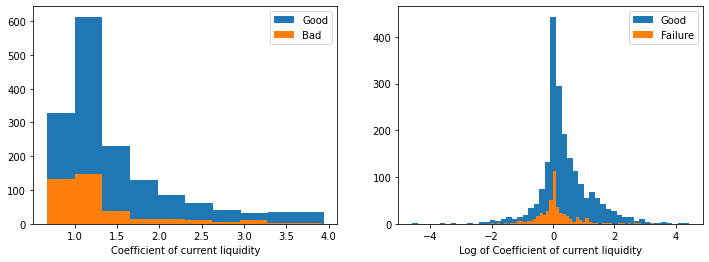

In [5]:
# put the name of the feature here to plot the histogram

f1 = 'Coefficient of current liquidity'

# Note, that here we use quantiles [0.1, 0.9] for better presentation, this helps to exclude data with extremal values

good = df[(df.Failure == 0) & (df[f1] >= df[f1].quantile(0.1)) & (df[f1] <= df[f1].quantile(0.9))][f1] 
bad =  df[(df.Failure == 1) & (df[f1] >= df[f1].quantile(0.1)) & (df[f1] <= df[f1].quantile(0.9))][f1] 

plt.figure(figsize = (12,4))
plt.subplot(121)
plt.hist(good, label = 'Good')
plt.hist(bad, label = 'Bad')
plt.legend()
plt.xlabel(f1)

# Here is the opprtunity to explain why sometimes logarithmic transformation is used
# and why it can be applied just to positive values

plt.subplot(122)
_ = plt.hist(np.log(df[(df.Failure == 0) & (df[f1] > 0)][f1]), bins = 50, label = 'Good')
_ = plt.hist(np.log(df[(df.Failure == 1) & (df[f1] > 0)][f1]), bins = 50, label = 'Failure')
plt.legend()
_ = plt.xlabel('Log of ' + f1)

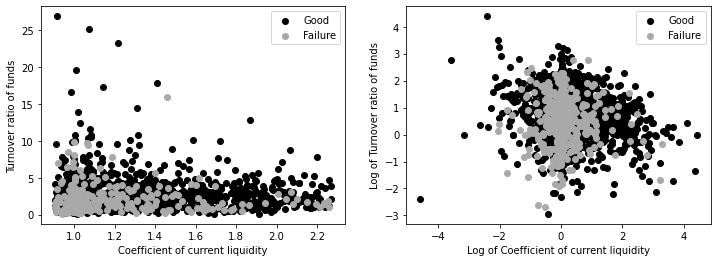

In [7]:
# put the name of the two features here to plot the scatter diagram
f1 = 'Coefficient of current liquidity'
f2 = 'Turnover ratio of funds'
#
plt.figure(figsize = (12,4))
plt.subplot(121)

good = df[(df.Failure == 0) & (df[f1] >= df[f1].quantile(0.2)) & (df[f1] <= df[f1].quantile(0.8))][[f1,f2]] 
bad =  df[(df.Failure == 1) & (df[f1] >= df[f1].quantile(0.2)) & (df[f1] <= df[f1].quantile(0.8))][[f1,f2]] 

#plt.scatter(df[df.Failure == 0][f1], df[df.Failure == 0][f2], label = 'Good')
#plt.scatter(df[df.Failure == 1][f1], df[df.Failure == 1][f2], label = 'Failure' )
plt.scatter(good[f1], good[f2], label = 'Good', c = 'black')
plt.scatter(bad[f1], bad[f2], label = 'Failure', c = 'darkgrey')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()

plt.subplot(122)
plt.scatter(np.log(df[df.Failure == 0][f1]), np.log(df[df.Failure == 0][f2]), label = 'Good', c = 'black')
plt.scatter(np.log(df[df.Failure == 1][f1]), np.log(df[df.Failure == 1][f2]), label = 'Failure',  c = 'darkgrey' )
plt.xlabel('Log of ' + f1)
plt.ylabel('Log of ' + f2)
_ = plt.legend()

#### Data preprocessing

It is option to discuss data preprocessing issues. 

#### Logistic regression

In [8]:
X = df.drop(['Failure'], axis = 1).values
y = df.Failure

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', random_state = 1)
_ = lr.fit(X,y)

In [10]:
from sklearn.metrics import accuracy_score 

print('Accuracy = {:.3f}'.format(accuracy_score(y, lr.predict(X))))

Accuracy = 0.828


### Lesson 2 --------------------------------------------------------------------------- 

This lesson starts with discussion how we can evaluate the performance of the model.
 - Introducing Accuracy. 
 - The problem of unbalanced data.
 - Confusion Matrix

#### Demonstration: Confusion Matrix

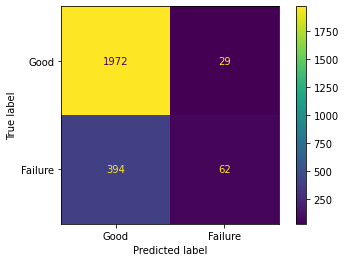

In [11]:
from sklearn.metrics import plot_confusion_matrix

# For printing in graysclae use the cmap = 'gray'
plot_confusion_matrix(lr, X, y, display_labels = ['Good', 'Failure'], cmap = 'viridis' ) 


#### ROC curve and Area Under Curve (AUC)

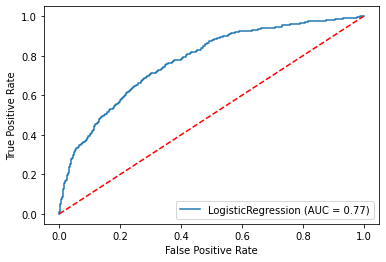

In [12]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X, y)
plt.plot([0,1],[0,1],'r--')

In [13]:
from sklearn.metrics import roc_auc_score
print('AUC = {:.3f}'.format(roc_auc_score(y, lr.predict_proba(X)[:,1])))

AUC = 0.775


#### Model Validation

It is time to discuss why we should evaluate the model on data that it has not yet seen.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)

# we create new model trained on just X_train dataset

lr_train = LogisticRegression(solver = 'liblinear', random_state = 1)
lr_train.fit(X_train, y_train)

print('Full dataset : AUC = {:.3f}'.format(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
print('Train dataset: AUC = {:.3f}'.format(roc_auc_score(y_test, lr_train.predict_proba(X_test)[:,1])))

Full dataset : AUC = 0.762
Train dataset: AUC = 0.750


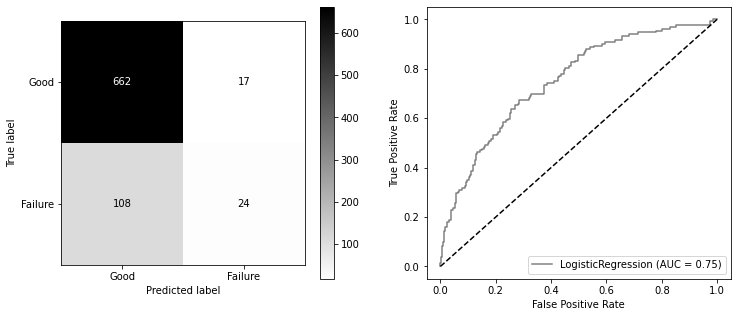

In [15]:
def plot_cm_and_roc(est, X, y):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,5))
    plot_confusion_matrix(est, X, y, display_labels = ['Good', 'Failure'], ax = ax[0], cmap = 'gray_r')
    plot_roc_curve(est, X, y, ax = ax[1], c = 'gray')
    ax[1].plot([0,1],[0,1],'k--')
        
# Model trained on train data
plot_cm_and_roc(lr_train, X_test, y_test)

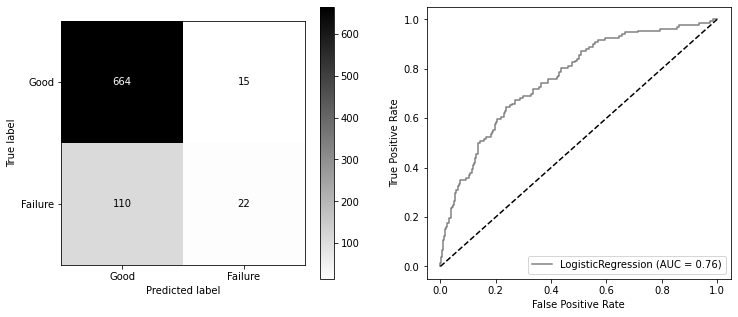

In [16]:
# Model trained of full data
plot_cm_and_roc(lr, X_test, y_test)

#### Cost-sensitive evaluation


| Variable | Formula | Value |
| :- | :-: | -: |
| Number of Suppliers  | NS | 2 457 |
| Mean Annual Revenue per Supplier (USD)| MR | 11 830 |
| Expected Revenue | NS * MR | 29 066 310 |
| Number of Unreliable Suppliers | US | 456 (18.6%) |
| Mean Annual Loss per Unreliable Supplier (USD) | ML | 17 628 |
| Annual Loss (USD) | US * ML | 15 633 462 |



In [17]:
# Actual revenue:

ER = 2457 * 11830
AR = (2457-456) * 11830 - 456 * 17628
print('Actual revenue is {:7,d} USD of {:.1f}% or expected'.format(AR, AR/ER*100))
print('Loss due to suppliers failure is {:7,d} USD'.format(ER-AR))

Actual revenue is 15,633,462 USD of 53.8% or expected
Loss due to suppliers failure is 13,432,848 USD


Loss due to incorrect  prediction is $C_{FP} * FP + C_{FN} * FN$

In [18]:
C_fp = 11830 
C_fn = 11830 + 17628

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, lr_train.predict(X_test)).ravel()
print('Loss = {:7,d}'.format(C_fp * fp + C_fn * fn))

Loss = 3,382,574


#### Cross-validation

In [19]:
from sklearn.model_selection import cross_val_score

cv = 5

res = cross_val_score(lr,X,y, scoring = 'roc_auc', cv = cv)
print('{:1d}-folds cross-validation: AUC - mean = {:.3f} std = {:.3f}'.format(cv, res.mean(), res.std()))

5-folds cross-validation: AUC - mean = 0.765 std = 0.028


In [20]:
# Cross-validation on the base of Loss
from sklearn.model_selection import KFold

def cross_val_loss(est, X, y, cv = 5):
    kf = KFold(n_splits = cv, shuffle = True, random_state = 1)
    loss = []
    for train_index, test_index in kf.split(X):
        est.fit(X[train_index], y[train_index])
        tn, fp, fn, tp = confusion_matrix(y[test_index], est.predict(X[test_index])).ravel()
        loss.append(C_fp * fp + C_fn * fn)
    return np.array(loss)
    
res = cross_val_loss(lr, X, y, cv = cv)
print('{:1d}-folds cross-validation: Loss - mean = {:7,.0f} std = {:7,.0f}'.format(cv, res.mean(), res.std()))

5-folds cross-validation: Loss - mean = 2,420,569 std = 406,001


### Lesson 3 ---------------------------------------------------------------------------

### Decison Tree

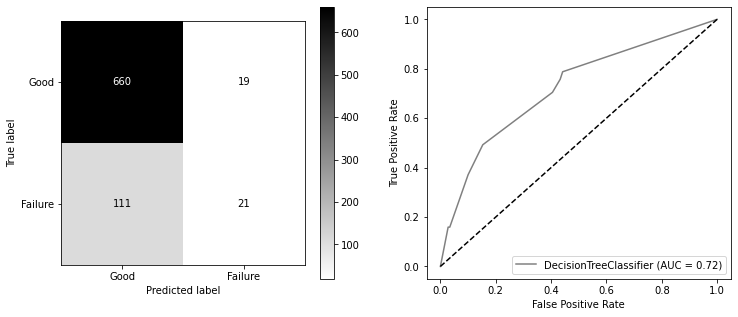

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
dt.fit(X_train,y_train)

plot_cm_and_roc(dt, X_test, y_test)

In [22]:
res = cross_val_score(dt,X,y, scoring = 'roc_auc', cv = 5)
print('{:1d}-folds cross-validation: AUC -  mean = {:.3f} std = {:.3f}'.format(cv, res.mean(), res.std()))
res = cross_val_loss(dt, X, y, cv = cv)
print('{:1d}-folds cross-validation: Loss - mean = {:7,.0f} std = {:7,.0f}'.format(cv, res.mean(), res.std()))

5-folds cross-validation: AUC -  mean = 0.749 std = 0.021
5-folds cross-validation: Loss - mean = 2,307,656 std = 230,169


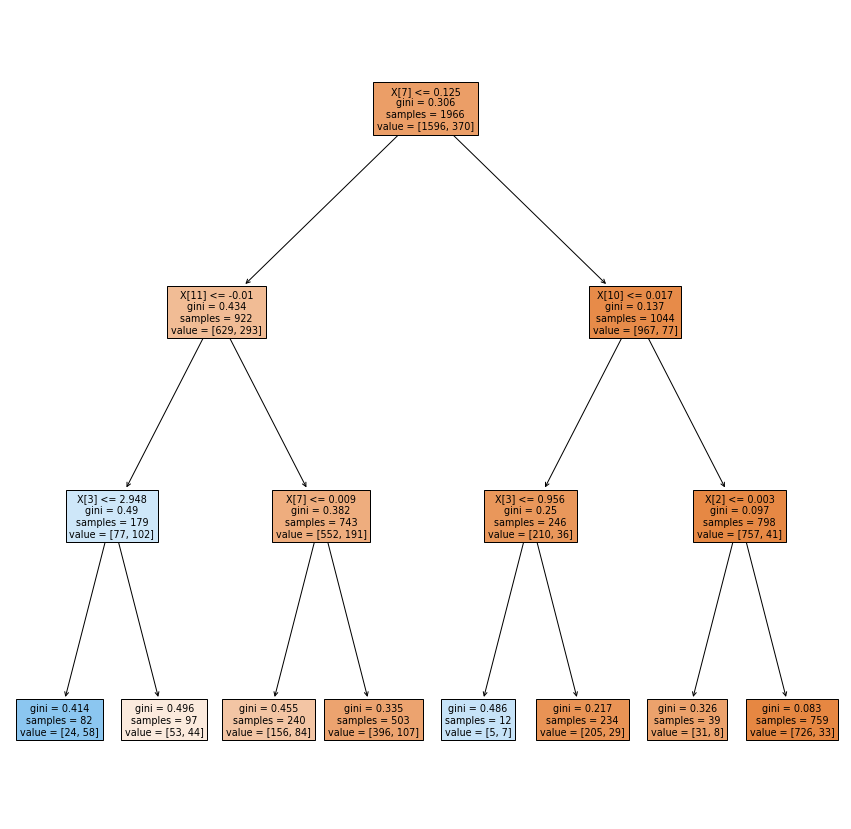

In [23]:
# Option: discuss impact of Decision Tree depth on the overfitiing

plt.figure(figsize = (15,15))
_ = plot_tree(dt, max_depth = None, filled = True)

### Neural Network

The architecture of NN should be discussed

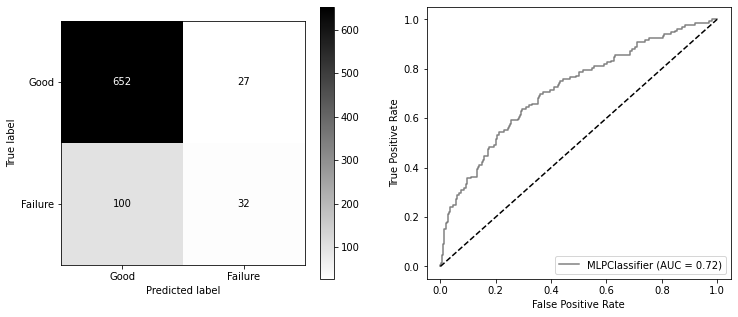

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20,10), activation='relu', solver='adam', max_iter = 500)

mlp.fit(X_train, y_train)

plot_cm_and_roc(mlp, X_test, y_test)

In [25]:
res = cross_val_score(mlp, X,y, scoring = 'roc_auc', cv = 5)
print('{:1d}-folds cross-validation: AUC  - mean = {:.3f} std = {:.3f}'.format(cv, res.mean(), res.std()))
res = cross_val_loss(mlp, X, y, cv = cv)
print('{:1d}-folds cross-validation: Loss - mean = {:7,.0f} std = {:7,.0f}'.format(cv, res.mean(), res.std()))

5-folds cross-validation: AUC  - mean = 0.724 std = 0.032
5-folds cross-validation: Loss - mean = 2,390,045 std = 358,953


### Ensembles

In [26]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

models = {'LR' : LogisticRegression(solver = 'liblinear', random_state = 1),
          'DT' : DecisionTreeClassifier(max_depth = 3, random_state = 1),
          'NN' : MLPClassifier(hidden_layer_sizes=(20,10), activation='relu', solver='adam', max_iter = 500),
          'BC' : BaggingClassifier(n_estimators = 100, random_state = 1),
          'RF' : RandomForestClassifier(n_estimators = 100, random_state = 1),
          'AB' : AdaBoostClassifier(n_estimators = 100, random_state = 1),
          'GB' : GradientBoostingClassifier(n_estimators = 100, random_state = 1)}

print('{:1d}-fold cross-validation:'.format(cv))
print('AUC -----------------------  | Loss ----------------')

for m in models:
    res = cross_val_score(models[m], X,y, scoring = 'roc_auc', cv = cv)
    loss = cross_val_loss(models[m], X,y, cv = cv)
    print('{:2s}: mean = {:.3f} std = {:.3f} | mean = {:7,.0f} std = {:7,.0f}'.format(m, res.mean(), res.std(), loss.mean(), loss.std()))


5-fold cross-validation:
AUC -----------------------  | Loss ----------------
LR: mean = 0.765 std = 0.028 | mean = 2,420,569 std = 406,001
DT: mean = 0.749 std = 0.021 | mean = 2,307,656 std = 230,169
NN: mean = 0.717 std = 0.029 | mean = 2,414,771 std = 236,613
BC: mean = 0.765 std = 0.028 | mean = 2,264,423 std = 299,583
RF: mean = 0.772 std = 0.032 | mean = 2,238,350 std = 321,786
AB: mean = 0.742 std = 0.029 | mean = 2,238,818 std = 286,881
GB: mean = 0.774 std = 0.038 | mean = 2,259,691 std = 318,480


#### Optional data for Model Intepretation

In [27]:
gb = GradientBoostingClassifier(n_estimators = 100, random_state = 1).fit(X, y)

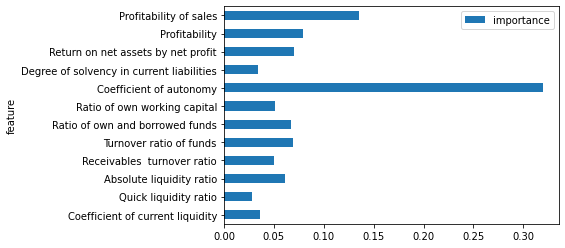

In [28]:
pd.DataFrame({'feature' : df.columns[:-1],'importance' : gb.feature_importances_}).set_index('feature').plot.barh()